In [1]:
import pandas as pd
from fredapi import Fred
import yfinance as yf
import re
from eurostat import get_data_df
import requests

In [3]:
data_dict = {}


data_dict['Orange Polska S.A.'] = yf.download('OPL.WA', period='max')['Close']
data_dict['TAURON Polska Energia S.A.'] = yf.download('TPE.WA', period='max')['Close']
data_dict['Asseco Poland S.A.'] = yf.download('ACP.WA', period='max')['Close']
data_dict['XTB S.A.'] = yf.download('XTB.WA', period='max')['Close']
data_dict['Cyfrowy Polsat S.A.'] = yf.download('CPS.WA', period='max')['Close']
data_dict['Dino Polska S.A.'] = yf.download('DNOPY', period='max')['Close']
data_dict['KGHM Polska Miedz S.A.'] = yf.download('KGHPF', period='max')['Close']
data_dict['Polenergia S.A.'] = yf.download('PEP.WA', period='max')['Close']
data_dict['Develia S.A.'] = yf.download('DVL.WA', period='max')['Close']
data_dict['Vercom S.A.'] = yf.download('VRC.WA', period='max')['Close']
data_dict['Auto Partner SA'] = yf.download('APR.WA', period='max')['Close']
data_dict['Globe Trade Centre S.A.'] = yf.download('GTC.WA', period='max')['Close']
data_dict['Rainbow Tours S.A.'] = yf.download('RBW.WA', period='max')['Close']
data_dict['Sygnity S.A.'] = yf.download('SGN.WA', period='max')['Close']
data_dict['Murapol S.A.'] = yf.download('MUR.WA', period='max')['Close']
data_dict['Tarczynski S.A.'] = yf.download('TAR.WA', period='max')['Close']
data_dict['Stalprodukt S.A.'] = yf.download('STP.WA', period='max')['Close']
data_dict['Celon Pharma S.A.'] = yf.download('CLN.WA', period='max')['Close']
data_dict['Wawel S.A.'] = yf.download('WWL.WA', period='max')['Close']
data_dict['Pkp Cargo S.A.'] = yf.download('PKP.WA', period='max')['Close']
data_dict['Selvita S.A.'] = yf.download('SLV.WA', period='max')['Close']
data_dict['Bioceltix S.A.'] = yf.download('BCX.WA', period='max')['Close']
data_dict['Wittchen S.A.'] = yf.download('WTN.WA', period='max')['Close']
data_dict['Action S.A.'] = yf.download('ACT.WA', period='max')['Close']

if data_dict:
    df = pd.concat(data_dict.values(), axis=1, keys=data_dict.keys())
    df_fill = df
else:
    None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
df_fill = df_fill.loc["2024-05-01":"2025-04-30"]
monthly_prices = df_fill.resample("ME").last()
returns = monthly_prices.pct_change().dropna()
std_devs = returns.std()
std_devs.index = [name for (name, ticker) in std_devs.index]


In [7]:
pe_ratios = {}
for ticker, name in zip(
    ['OPL.WA', 'TPE.WA', 'ACP.WA', 'XTB.WA', 'CPS.WA', 'DNOPY', 'KGHPF', 'PEP.WA', 'DVL.WA',
     'VRC.WA', 'APR.WA', 'GTC.WA', 'RBW.WA', 'SGN.WA', 'MUR.WA', 'TAR.WA', 'STP.WA', 'CLN.WA',
     'WWL.WA', 'PKP.WA', 'SLV.WA', 'BCX.WA', 'WTN.WA', 'ACT.WA'],
    data_dict.keys()
):
    try:
        info = yf.Ticker(ticker).info
        pe_ratios[name] = info.get("trailingPE", None)
    except:
        pe_ratios[name] = None


In [10]:
print(pe_ratios)

{'Orange Polska S.A.': 14.111764, 'TAURON Polska Energia S.A.': 21.484848, 'Asseco Poland S.A.': 22.214941, 'XTB S.A.': 11.744857, 'Cyfrowy Polsat S.A.': 12.46454, 'Dino Polska S.A.': 35.60396, 'KGHM Polska Miedz S.A.': 8.505292, 'Polenergia S.A.': 15.143487, 'Develia S.A.': 10.268292, 'Vercom S.A.': 32.295517, 'Auto Partner SA': 13.815789, 'Globe Trade Centre S.A.': 11.911765, 'Rainbow Tours S.A.': 9.110379, 'Sygnity S.A.': 83.24324, 'Murapol S.A.': 10.987342, 'Tarczynski S.A.': 7.7505827, 'Stalprodukt S.A.': 47.134937, 'Celon Pharma S.A.': 72.72727, 'Wawel S.A.': 11.560487, 'Pkp Cargo S.A.': None, 'Selvita S.A.': None, 'Bioceltix S.A.': None, 'Wittchen S.A.': 8.433735, 'Action S.A.': 9.449541}


In [9]:
final_df = pd.DataFrame({
    'P/E': pd.Series(pe_ratios),
    'Volatility': std_devs
}).dropna()

In [11]:
final_df.columns.values[0] = 'C/Z'
final_df.columns.values[1] = 'Zmiennosc'
final_df

,C/Z,Zmiennosc
Orange Polska S.A.,14.105883,0.066286
TAURON Polska Energia S.A.,21.557575,0.083836
Asseco Poland S.A.,22.254260,0.096144
XTB S.A.,11.739369,0.095426
Cyfrowy Polsat S.A.,12.500000,0.122545
Dino Polska S.A.,35.603960,0.120249
KGHM Polska Miedz S.A.,8.505292,0.090266
Polenergia S.A.,15.099338,0.049916
Develia S.A.,10.219512,0.081826
Vercom S.A.,32.295517,0.068536


In [13]:
final_df.iloc[[13,16,15,6,12]]

,C/Z,Zmiennosc
Sygnity S.A.,83.243240,0.067225
Stalprodukt S.A.,47.134937,0.063844
Tarczynski S.A.,7.750583,0.154973
KGHM Polska Miedz S.A.,8.505292,0.090266
Rainbow Tours S.A.,9.104888,0.071505


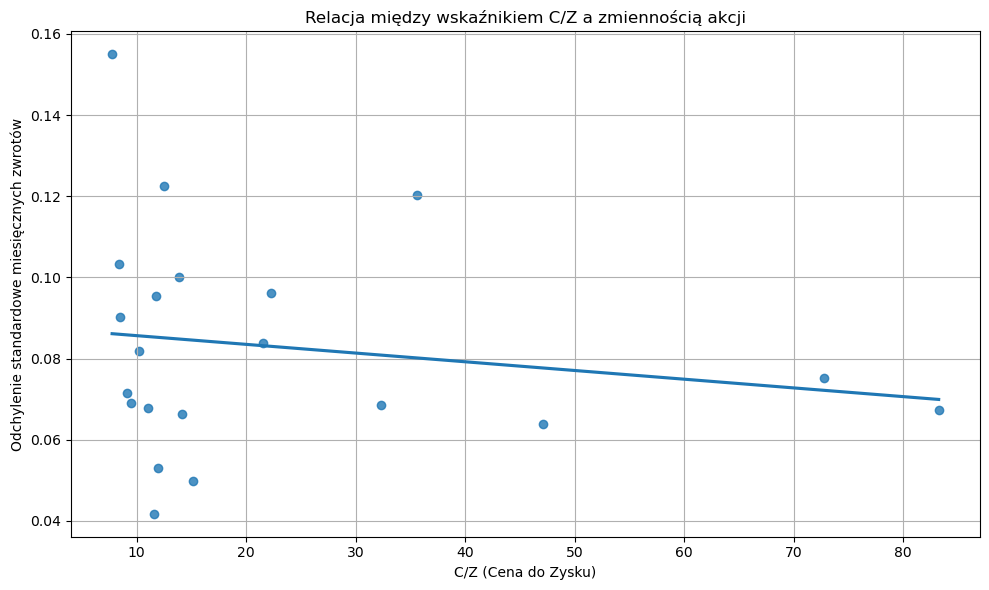

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(data=final_df, x='C/Z', y='Zmiennosc', ci=None)
plt.title('Relacja między wskaźnikiem C/Z a zmiennością akcji')
plt.xlabel('C/Z (Cena do Zysku)')
plt.ylabel('Odchylenie standardowe miesięcznych zwrotów')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
correlation = final_df['C/Z'].corr(final_df['Zmiennosc'])
print(f"Korelacja C/Z vs Zmienność: {correlation:.2f}")


Korelacja C/Z vs Zmienność: -0.17
